# Importing Packages

In [11]:
import numpy as np
from numpy import linalg
from scipy import linalg as splinalg
import matplotlib.pyplot as plt
from scipy import sparse as sp
import scipy.sparse.linalg
from functools import reduce
import itertools
from scipy import linalg
from scipy.linalg import expm, logm
from scipy.special import comb
from itertools import combinations_with_replacement, product
from collections import Counter
import copy
from scipy.linalg import ishermitian
import time
from scipy.integrate import solve_ivp

# Definitions

In [12]:
J = 1.0  # Coupling constant
N, U = 2, 0.5
nu = N*U # Additional constant (nu)
hbar = 1.0  # Planck's constant (normalized)

def system(t, y, **kwargs):
    '''
    Definition of the ODEs.
    z-value is bound between -1 and 1 due to singularity in eqn-17.
    
    Args:
    y: list of initial conditions [phi, z]
    t: range of time list
    '''
    phi, z = y  # Unpack y into phi and z
    if np.abs(z) >= 1:
        z = np.sign(z) * 0.999
    phi_dot = (J * z * np.cos(phi)) / np.sqrt(1 - z**2) + (nu * z) / 4
    z_dot = -J * np.sqrt(1 - z**2) * np.sin(phi)
    return [phi_dot, z_dot]


# Initial Conditions and Time-range

In [13]:
# Time range for integration
t_span = (0, 10)
t_eval = np.linspace(*t_span, 500)

# Initial conditions (phi(0), z(0))
initial_conditions = [
    # [0, 0],
    # [0, 0.1],
    # [0, 0.2],
    # [0, -0.9],

    [np.pi/4, 0],
    # [np.pi/4, 0.1],
    # [np.pi/4, 0.2],
    [np.pi/4, -0.5],

    [np.pi, 0],
    [np.pi, 0.5],
    # [np.pi, 0.2],
    # [np.pi, -0.9],
    
    # [0.1, 0.5],
    # [0.1, -0.5],
    # [np.pi/2, 0.3],
    # [np.pi/2, -0.3],
    # [np.pi, 0.1],
    # [np.pi, -0.1],
    # [np.pi/4, 0.8],
    # [np.pi/4, -0.8],
    # [3*np.pi/4, 0.8],
    # [3*np.pi/4, -0.8],
    # [np.pi, -0.3],
    # [np.pi, 0.8],
    # [5*np.pi/4, -0.3],
    # [2*np.pi, -0.3],
    # [3*np.pi, -0.3],
]

# Plotting Phase Portraits

(Phi, z)=(0.7853981633974483, 0):
 phi_vals=0.7852622585209338,
 z_vals=-0.014169360796678989
(Phi, z)=(0.7853981633974483, -0.5):
 phi_vals=0.7745020770133947,
 z_vals=-0.5121552663875851
(Phi, z)=(3.141592653589793, 0):
 phi_vals=3.141592653589793,
 z_vals=-2.4542020022993048e-18
(Phi, z)=(3.141592653589793, 0.5):
 phi_vals=3.1325283492383473,
 z_vals=0.499921338523049


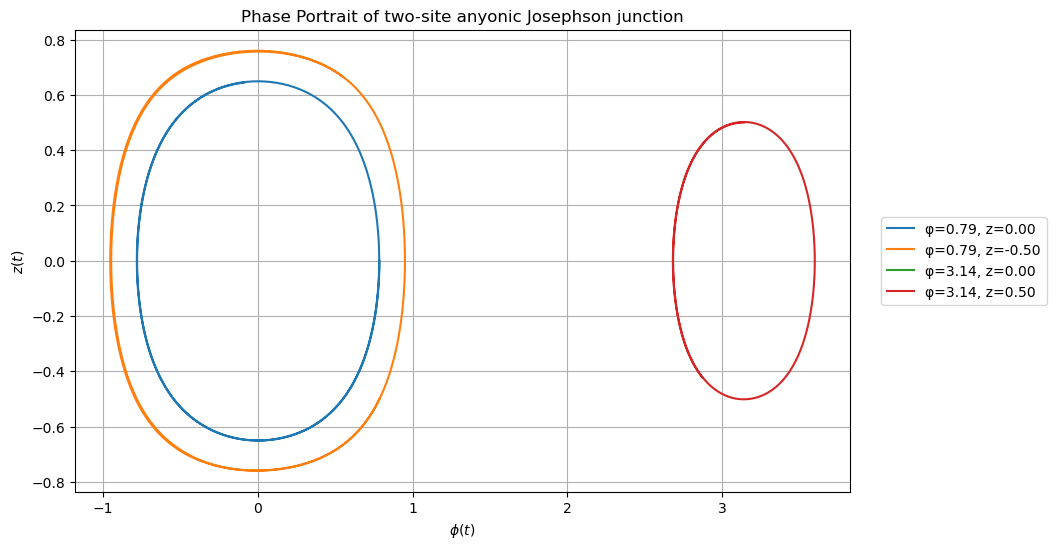

In [14]:
# Plot phase portraits
plt.figure(figsize=(10, 6))

for phi0, z0 in initial_conditions:
    # Solve the system of equations
    sol = solve_ivp(system, t_span, [phi0, z0], t_eval=t_eval, method='RK45')

    # Extract solutions
    phi_vals = sol.y[0]
    z_vals = sol.y[1]

    print(f'(Phi, z)={phi0, z0}:\n phi_vals={phi_vals[1]},\n z_vals={z_vals[1]}')
    
    # Plot phase portrait
    plt.plot(phi_vals, z_vals, label=f'φ={phi0:.2f}, z={z0:.2f}')
    
plt.xlabel(r'$\phi(t)$') 
plt.ylabel(r'$z(t)$') 
plt.title('Phase Portrait of two-site anyonic Josephson junction')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.grid(True)
plt.show()

In [15]:
plt.savefig('ODEs-twosite_phaseportrait.png') 

<Figure size 640x480 with 0 Axes>

# Plotting $\phi$ \& $z$ as functions of time

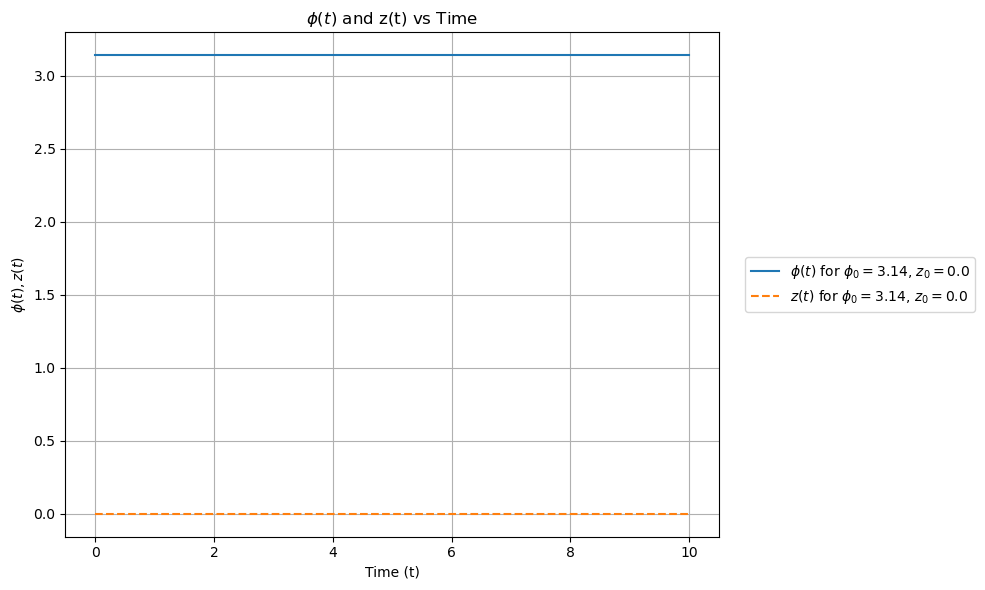

In [16]:
initial_conditions = [
   [np.pi, 0]
]

plt.figure(figsize=(10, 6))

for phi0, z0 in initial_conditions:
    sol = solve_ivp(system, t_span, [phi0, z0], t_eval=t_eval, method='RK45')

    phi_vals = sol.y[0]
    z_vals = sol.y[1]

    plt.plot(t_eval, phi_vals, label=rf'$\phi(t)$ for $\phi_{{0}}={phi0:.2f}$, $z_{{0}}={z0:.1f}$')
    plt.plot(t_eval, z_vals, label=rf'$z(t)$ for $\phi_{{0}}={phi0:.2f}$, $z_{{0}}={z0:.1f}$', linestyle='--')

plt.xlabel('Time (t)')
plt.ylabel(r'$\phi(t), z(t)$')
plt.title(r'$\phi(t)$ and z(t) vs Time')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
plt.savefig('ODEs-vs-time-twosite_phaseportrait.png') 

<Figure size 640x480 with 0 Axes>

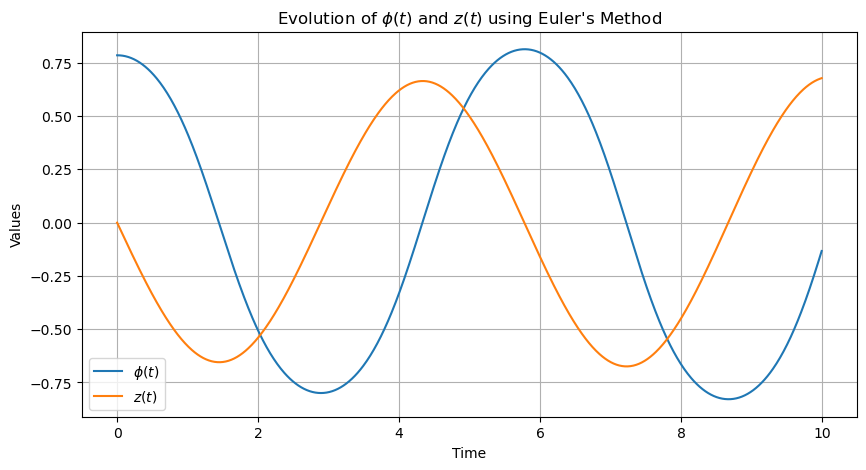

In [19]:
## Using Euler's method
import numpy as np
import matplotlib.pyplot as plt

def system(t, y, params):
    """
    Definition of the ODEs.
    Args:
    t: Current time (not used here but included for compatibility with general ODE solvers)
    y: List of state variables [phi, z]
    params: Dictionary of parameters {'t', 'k', 'U'}
    
    Returns:
    List [phi_dot, z_dot]
    """
    phi, z = y  # Unpack y into phi and z
    phi_dot = ((params['t'] * z * np.cos(phi)) / np.sqrt(1 - z**2)) + ((params['k'] * params['U'] * z) / 4)
    z_dot = -params['t'] * np.sqrt(1 - z**2) * np.sin(phi)
    return [phi_dot, z_dot]

def euler_method(system, y0, t_range, dt, params):
    """
    Solves a system of ODEs using Euler's method.
    Args:
    system: Function defining the system of ODEs
    y0: Initial conditions [phi_0, z_0]
    t_range: Time range as [t_start, t_end]
    dt: Time step size
    params: Dictionary of parameters
    
    Returns:
    time_points: Array of time points
    solution: Array of solutions [phi, z] at each time step
    """
    t_start, t_end = t_range
    time_points = np.arange(t_start, t_end, dt)
    solution = np.zeros((len(time_points), len(y0)))  # Preallocate solution array
    solution[0] = y0  # Set initial condition
    
    for i in range(1, len(time_points)):
        t = time_points[i - 1]
        y = solution[i - 1]
        dydt = system(t, y, params)
        solution[i] = y + dt * np.array(dydt)  # Euler step
    
    return time_points, solution

# Parameters
params = {'t': 1.0, 'k': 1.0, 'U': 1.0}  # Example parameter values
y0 = [np.pi/4, 0]  # Initial conditions [phi_0, z_0]
t_range = [0, 10]  # Time range [t_start, t_end]
dt = 0.01  # Time step

# Solve system
time_points, solution = euler_method(system, y0, t_range, dt, params)

# Plot results
phi, z = solution[:, 0], solution[:, 1]
plt.figure(figsize=(10, 5))
plt.plot(time_points, phi, label=r'$\phi(t)$')
plt.plot(time_points, z, label=r'$z(t)$')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.title('Evolution of $\phi(t)$ and $z(t)$ using Euler\'s Method')
plt.grid()
plt.show()

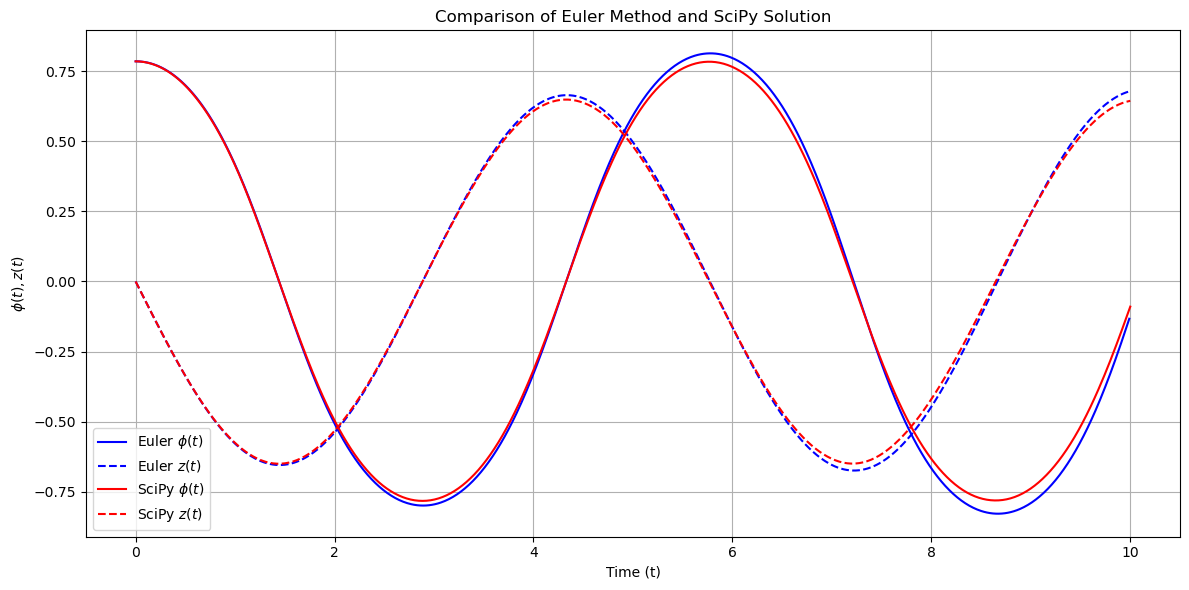

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# System of ODEs
def system(t, y, params):
    phi, z = y  # Unpack y into phi and z
    phi_dot = ((params['t'] * z * np.cos(phi)) / np.sqrt(1 - z**2)) + ((params['k'] * params['U'] * z) / 4)
    z_dot = -params['t'] * np.sqrt(1 - z**2) * np.sin(phi)
    return [phi_dot, z_dot]

# Euler method function
def euler_method(system, y0, t_range, dt, params):
    t_start, t_end = t_range
    time_points = np.arange(t_start, t_end, dt)
    solution = np.zeros((len(time_points), len(y0)))
    solution[0] = y0
    
    for i in range(1, len(time_points)):
        t = time_points[i - 1]
        y = solution[i - 1]
        dydt = system(t, y, params)
        solution[i] = y + dt * np.array(dydt)
    
    return time_points, solution

# Parameters
params = {'t': 1.0, 'k': 1.0, 'U': 1.0}
y0 = [np.pi/4, 0]  # Initial conditions [phi_0, z_0]
t_range = (0, 10)
dt = 0.01

# Euler method solution
euler_time, euler_sol = euler_method(system, y0, t_range, dt, params)
phi_euler, z_euler = euler_sol[:, 0], euler_sol[:, 1]

# SciPy solve_ivp solution
t_eval = np.linspace(*t_range, 500)
sol = solve_ivp(system, t_range, y0, t_eval=t_eval, args=(params,), method='RK45')
phi_scipy, z_scipy = sol.y[0], sol.y[1]

# Plot results
plt.figure(figsize=(12, 6))

# Euler method
plt.plot(euler_time, phi_euler, label=r'Euler $\phi(t)$', linestyle='-', color='blue')
plt.plot(euler_time, z_euler, label=r'Euler $z(t)$', linestyle='--', color='blue')

# SciPy solve_ivp
plt.plot(t_eval, phi_scipy, label=r'SciPy $\phi(t)$', linestyle='-', color='red')
plt.plot(t_eval, z_scipy, label=r'SciPy $z(t)$', linestyle='--', color='red')

# Labels and legend
plt.xlabel('Time (t)')
plt.ylabel(r'$\phi(t), z(t)$')
plt.title('Comparison of Euler Method and SciPy Solution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()